In [1]:
import numpy as np
from class_snapbot import Snapbot4EnvClass
from class_grp import *
from class_pid import *
from utils import *

Snapbot(4legs) Environment
Obs Dim: [103] Act Dim: [8] dt:[0.02] Condition:[None]
ctrl_coef:[0] body_coef:[0] jump_coef:[0] vel_coef:[0] head_coef:[0]
Found 5 GPUs for rendering. Using device 0.


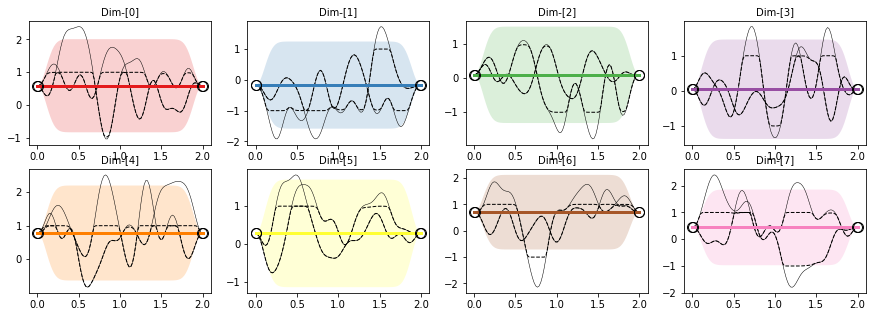

Done.


In [2]:
env = Snapbot4EnvClass(render_mode='rgb_array')
PID = PIDControllerClass(                 
                        name      = 'PID',
                        k_p       = 0.2,
                        k_i       = 0.001,
                        k_d       = 0.01,
                        dim       = 8,
                        dt_min    = 1e-6,
                        out_min   = -1.5,
                        out_max   = 1.5,
                        ANTIWU    = True, 
                        out_alpha = 0.0   
                        )
G = GaussianRandomPathClass(name = 'LGRP',kernel = kernel_levse)
G.set_prior(hyp={'g':1/2,'l':1/8,'w':1e-8})
# G.set_posterior(
#                 t_anchor = np.linspace(start=0, stop=2, num=5).reshape(-1,1),
#                 x_anchor = np.random.standard_normal((5,8)),
#                 lbtw     = 0.8,
#                 t_test   = np.linspace(start=0, stop=2, num=200).reshape(-1,1),
#                 hyp = {'g':1/4,'l':1/5,'w':1e-8},
#                 APPLY_EPSRU = True,
#                 t_eps = 0.05)
G.plot(n_sample=2,ss_x_min=-1*np.ones(8),ss_x_max=1*np.ones(8),ss_margin=0.2,figsize=(15,5),subplot_rc=(2,4),lw_sample=1/2,tfs=10,rand_type='Uniform')
print ("Done.")

In [6]:
traj_joints, traj_secs = G.sample_one_traj(rand_type='Uniform', ORG_PERTURB=True, perturb_gain=0.0) 


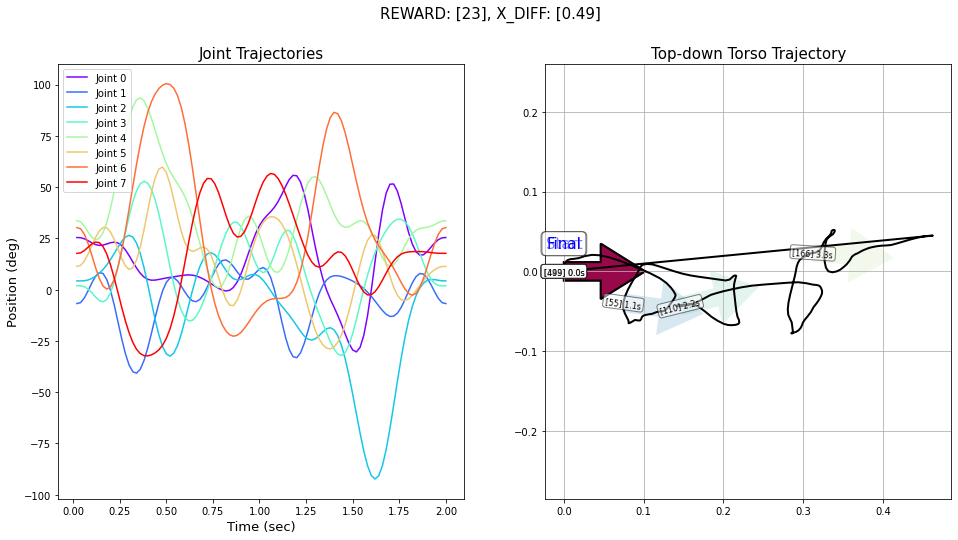

In [7]:
traj_joints_deg = scaleup_traj(env, traj_joints, DO_SQUASH=False, squash_margin=30)
dic = rollout(env, PID, traj_joints_deg, 5, RENDER=False, PLOT=True)

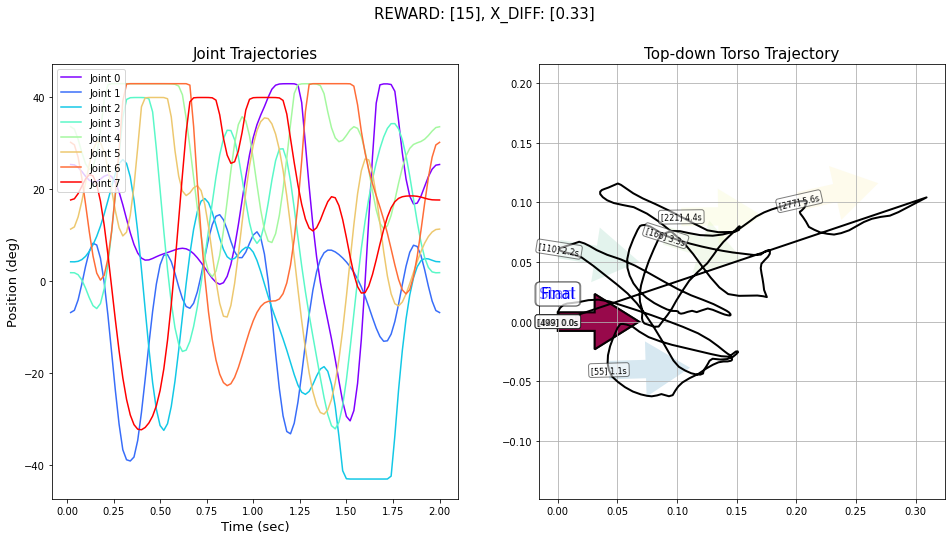

In [9]:
traj_joints_deg = scaleup_traj(env, traj_joints, DO_SQUASH=True, squash_margin=5)
dic = rollout(env, PID, traj_joints_deg, 5, RENDER=False, PLOT=True)